In [1]:
import torch
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import numpy as np

In [2]:
from sklearn.datasets import load_iris

data,label = load_iris(return_X_y=True)
ind = np.where(label < 2)
X = torch.tensor(data[ind]).float()
Y = torch.tensor(np.eye(2)[label[ind]]).float()
print(X.shape, Y.shape)

torch.Size([100, 4]) torch.Size([100, 2])


In [3]:
class MLP:
    def __init__(self, input_size, hidden_size, num_classes, lr=0.01):
        self.lr = lr
        self.hist = []

        self.W1 = Variable(torch.randn(input_size, hidden_size), requires_grad=True)
        self.b1 = Variable(torch.ones(hidden_size), requires_grad=True)
        self.W1.data.fill_(1.)
        self.b1.data.fill_(1.)
        
        self.W2 = Variable(torch.randn(hidden_size, num_classes), requires_grad=True)
        self.b2 = Variable(torch.ones(num_classes), requires_grad=True)
        self.W2.data.fill_(1.)
        self.b2.data.fill_(1.)
    
    def softmax(self, x):
        e = torch.exp(x - torch.max(x))
        return e/e.sum()
    
    def relu(self, x):
        return torch.max(x,torch.zeros_like(x))
    
    def cross_entropy(self, y, o):
        t = y*torch.log(o+1e-10)
        return -torch.sum(t)
    
    def forward(self, x):
        h = self.relu(torch.matmul(x, self.W1) + self.b1)
        o = self.softmax(torch.matmul(h, self.W2) + self.b2)
        return o
    
    def backward(self, loss):
        loss.backward()     
        
        self.W1.data -=  self.lr * self.W1.grad.data
        self.b1.data -= self.lr * self.b1.grad.data
        
        self.W2.data -= self.lr * self.W2.grad.data
        self.b2.data -= self.lr * self.b2.grad.data
        
        
    def train(self, X, Y, epochs, verbose):
        for i in range(epochs):
            losses = []
            for x,y in zip(X,Y):
                o = self.forward(x)
                loss = self.cross_entropy(y, o)
                self.backward(loss)
                losses += [loss.item()]
            loss = np.mean(losses)
            self.hist += [loss]
            if (i+1) % verbose == 0:
                print((i+1),'loss:',loss)
                
    def plot_hist(self,):
        plt.figure(figsize=(20,10))
        plt.title('loss')
        plt.plot(self.hist)
        plt.show()
            

In [8]:
mlp = MLP(input_size=4, hidden_size=4, num_classes=2, lr=0.0001)

In [9]:
mlp.train(X,Y,100,verbose=10)

10 loss: 1.006459238231182
20 loss: 0.9847789570689202
30 loss: 0.9372696271538734
40 loss: 0.8856221547722817
50 loss: 0.8543628513813019
60 loss: 0.8592765539884567
70 loss: 0.8978313076496124
80 loss: 0.9508117309212685
90 loss: 0.9934759032726288
100 loss: 1.0060740247368813


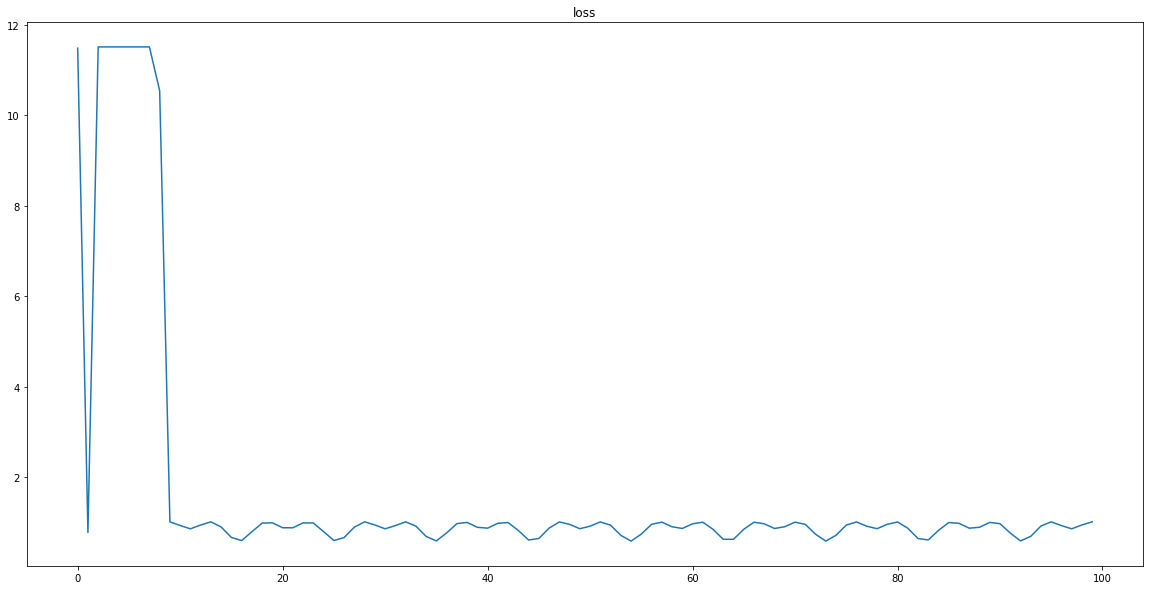

In [10]:
mlp.plot_hist()